Name: Karan Doshi,
      Sonali desarada,
      Vidhi Rathod

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dataset imported
obesity_df = pd.read_csv('data/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
#Calculating total rows and columns
obesity_df.shape

(2111, 17)

In [5]:
#obesity_df['BMI'] = obesity_df['Weight']/(obesity_df['Height'] ** 2)

In [27]:
#Rounding out number 
obesity_df['Weight'] = obesity_df['Weight'].apply(lambda weight : round(weight)) 

In [7]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,90,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
#Checking the data type of each columnn
obesity_df.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [9]:
#Data encoding 
c = obesity_df.NObeyesdad.astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


In [10]:
#Convert categorical columns into numeric columns
obesity_df['Gender'] = obesity_df['Gender'].astype('category').cat.codes
obesity_df['family_history_with_overweight'] = obesity_df['family_history_with_overweight'].astype('category').cat.codes
obesity_df['FAVC'] = obesity_df['FAVC'].astype('category').cat.codes
obesity_df['CAEC'] = obesity_df['CAEC'].astype('category').cat.codes
obesity_df['SMOKE'] = obesity_df['SMOKE'].astype('category').cat.codes
obesity_df['SCC'] = obesity_df['SCC'].astype('category').cat.codes
obesity_df['CALC'] = obesity_df['CALC'].astype('category').cat.codes
obesity_df['MTRANS'] = obesity_df['MTRANS'].astype('category').cat.codes
obesity_df['NObeyesdad'] = obesity_df['NObeyesdad'].astype('category').cat.codes


In [11]:
# Rounding age column values 
obesity_df['Age'] = obesity_df['Age'].apply(lambda age : round(age)) 

In [12]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21,1.52,56,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23,1.80,77,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27,1.80,87,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22,1.78,90,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [146]:
#Calculating mean median and std
obesity_df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.315964,1.701677,86.586452,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,2.365230,3.015632
std,0.500083,6.357078,0.093305,26.190136,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.952090
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,1.630000,65.500000,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,3.000000,1.000000
50%,1.000000,23.000000,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.000000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


## Data Preprocessing

- Data Cleaning: clean the data by filling missing values, smoothing the noisy data, resolving the inconsistency, and removing outliers
- Data Integration: 
- Data Transformation
- Data Reduction

In [25]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Data Cleaning
# 1. Deal with Missing values
# 1.1 Ignore those tuples
# 1.2 Fill in the missing values 
obesity_df.isna().sum()
import missingno as msno
msno.matrix(obesity_df)
# 2. Deal with noisy data
# 2.1 Binning using cut and qcut
cat_columns = obesity_df.select_dtypes(['category']).columns



In [148]:
# function number_of_outliers for checking the number of outliers in the dataset
def number_of_outliers(df):
    
    df = df.select_dtypes(exclude = 'object')
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

number_of_outliers(obesity_df)

Gender                              0
Age                               160
Height                              1
Weight                              1
family_history_with_overweight    385
FAVC                              245
FCVC                                0
NCP                               579
CAEC                              346
SMOKE                              44
CH2O                                0
SCC                                96
FAF                                 0
TUE                                 0
CALC                                1
MTRANS                            531
NObeyesdad                          0
dtype: int64

In [14]:
import pandas as pd

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]

In [15]:
#Removing the outliers from Height and weight
obesity_df = remove_outliers(obesity_df, 'Height')
obesity_df = remove_outliers(obesity_df, 'Weight')

<AxesSubplot: >

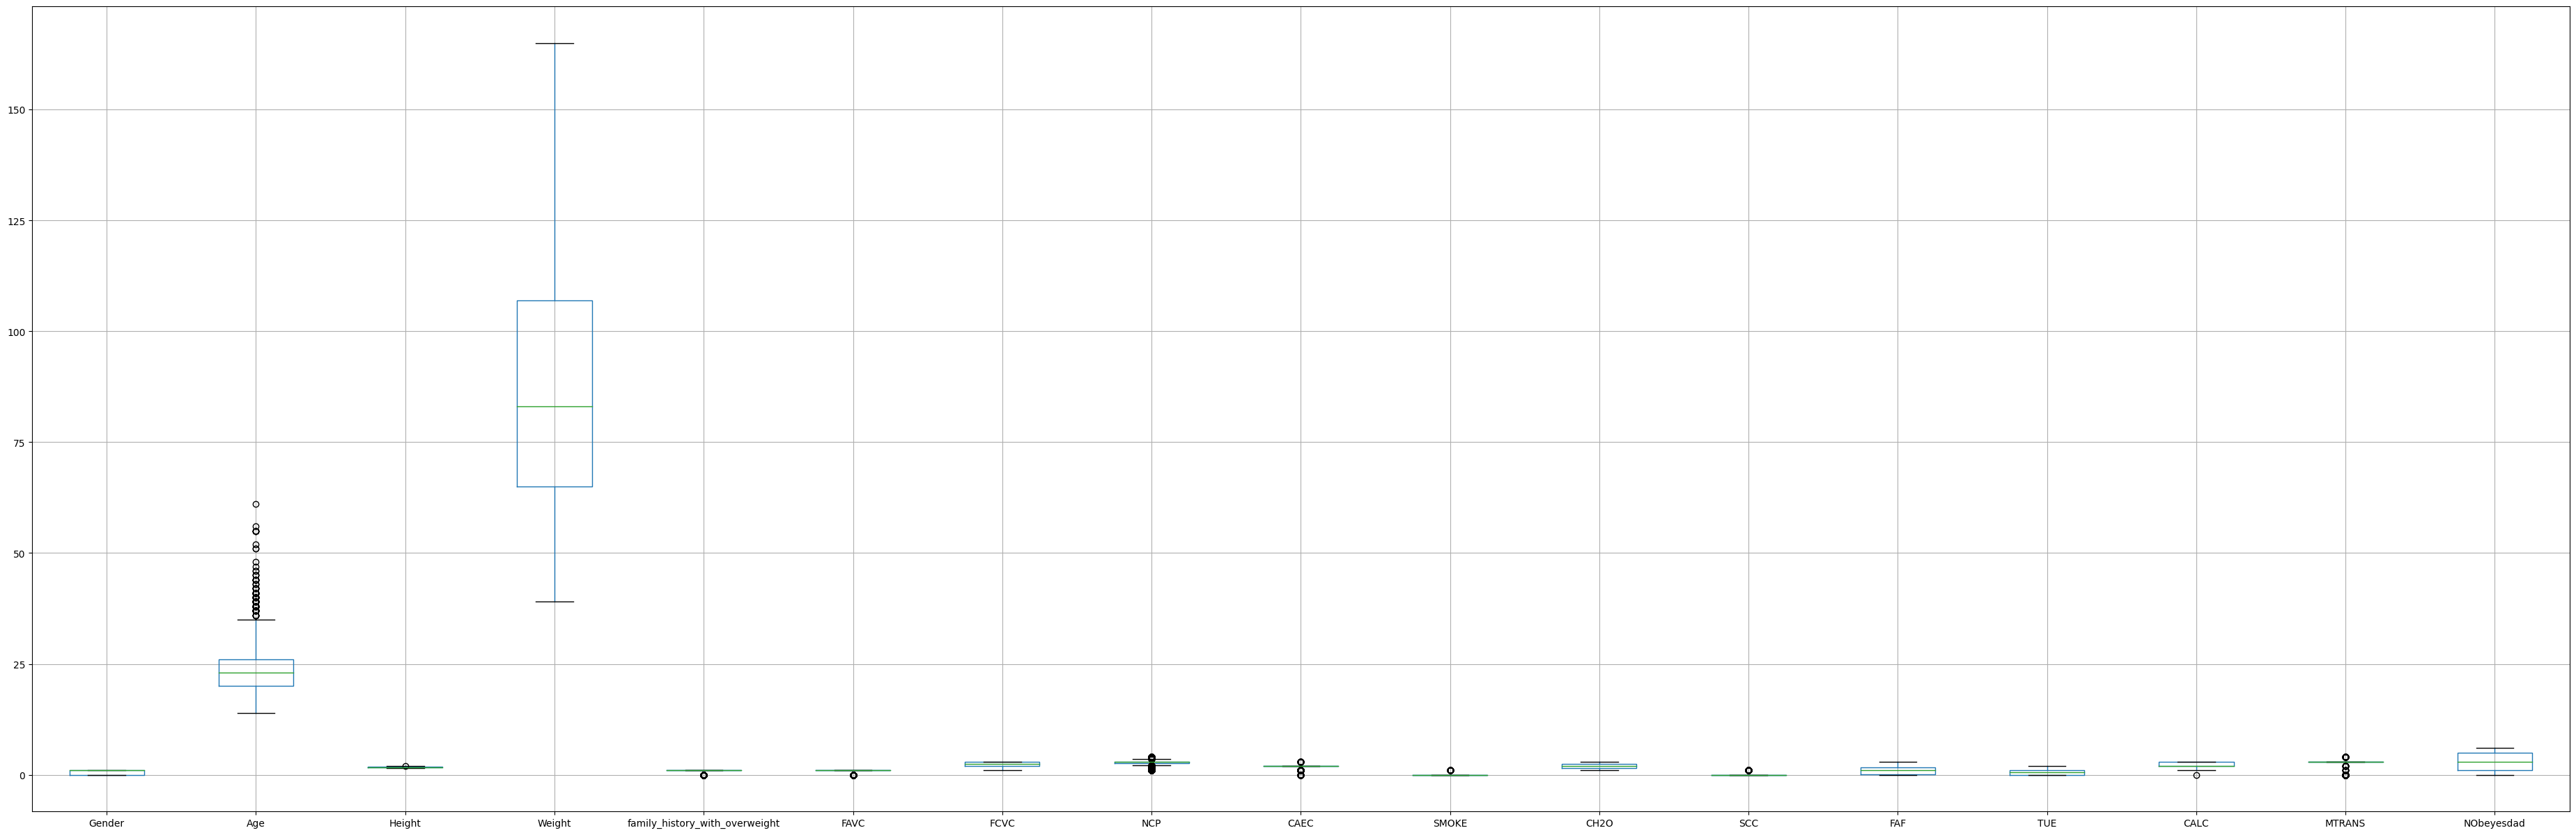

In [16]:
obesity_df.boxplot(figsize=(47,15))

In [17]:
#sns.boxplot(obesity_df["MTRANS"],obesity_df["NObeyesdad"])
#plt.show()

In [18]:
#(part 4) For all columns, visualize distribution of the data using histogram. 
#Comment on the data’s modality (i.e., bimodal, trimodal, etc.)
obesity_df.hist(figsize=(20,15)) 

array([[<AxesSubplot: title={'center': 'Gender'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Height'}>,
        <AxesSubplot: title={'center': 'Weight'}>],
       [<AxesSubplot: title={'center': 'family_history_with_overweight'}>,
        <AxesSubplot: title={'center': 'FAVC'}>,
        <AxesSubplot: title={'center': 'FCVC'}>,
        <AxesSubplot: title={'center': 'NCP'}>],
       [<AxesSubplot: title={'center': 'CAEC'}>,
        <AxesSubplot: title={'center': 'SMOKE'}>,
        <AxesSubplot: title={'center': 'CH2O'}>,
        <AxesSubplot: title={'center': 'SCC'}>],
       [<AxesSubplot: title={'center': 'FAF'}>,
        <AxesSubplot: title={'center': 'TUE'}>,
        <AxesSubplot: title={'center': 'CALC'}>,
        <AxesSubplot: title={'center': 'MTRANS'}>],
       [<AxesSubplot: title={'center': 'NObeyesdad'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

In [19]:
obesity_df.dtypes


Gender                               int8
Age                                 int64
Height                            float64
Weight                              int64
family_history_with_overweight       int8
FAVC                                 int8
FCVC                              float64
NCP                               float64
CAEC                                 int8
SMOKE                                int8
CH2O                              float64
SCC                                  int8
FAF                               float64
TUE                               float64
CALC                                 int8
MTRANS                               int8
NObeyesdad                           int8
dtype: object

In [20]:
import seaborn as sns

sns.set()
sns.pairplot(obesity_df)

In [21]:
corr_matrix = obesity_df.corr()
corr_matrix

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
Gender,1.000000,0.049506,0.618293,0.159675,0.102128,0.064628,-0.274891,0.067258,0.094737,0.044856,0.107294,-0.102479,0.189216,0.016753,0.008109,-0.138090,0.024930
Age,0.049506,1.000000,-0.024451,0.206189,0.205961,0.063705,0.017157,-0.043639,0.082406,0.091271,-0.045133,-0.116244,-0.144699,-0.296302,-0.046013,-0.600446,0.235840
Height,0.618293,-0.024451,1.000000,0.460783,0.247352,0.178066,-0.038068,0.243476,0.056421,0.055993,0.211840,-0.133646,0.294675,0.050790,-0.128937,-0.074977,0.039409
Weight,0.159675,0.206189,0.460783,1.000000,0.497083,0.272333,0.216252,0.106912,0.295274,0.026144,0.199790,-0.201966,-0.053556,-0.073141,-0.206372,0.003634,0.388363
family_history_with_overweight,0.102128,0.205961,0.247352,0.497083,1.000000,0.207908,0.040326,0.071202,0.171885,0.017453,0.147184,-0.185348,-0.056955,0.022697,0.036918,-0.101788,0.313743
FAVC,0.064628,0.063705,0.178066,0.272333,0.207908,1.000000,-0.027349,-0.007140,0.151764,-0.050613,0.009450,-0.190599,-0.108235,0.068238,-0.089358,-0.069986,0.044593
FCVC,-0.274891,0.017157,-0.038068,0.216252,0.040326,-0.027349,1.000000,0.042179,-0.055476,0.014347,0.069142,0.071916,0.019349,-0.101274,-0.060740,0.064706,0.018079
NCP,0.067258,-0.043639,0.243476,0.106912,0.071202,-0.007140,0.042179,1.000000,-0.097138,0.007868,0.056820,-0.015542,0.129335,0.036118,-0.071562,-0.054062,-0.092632
CAEC,0.094737,0.082406,0.056421,0.295274,0.171885,0.151764,-0.055476,-0.097138,1.000000,-0.055938,0.148798,-0.110283,-0.029262,-0.047242,-0.049204,-0.047371,0.328287
SMOKE,0.044856,0.091271,0.055993,0.026144,0.017453,-0.050613,0.014347,0.007868,-0.055938,1.000000,-0.031904,0.047703,0.011299,0.017694,-0.082555,-0.010633,-0.023261


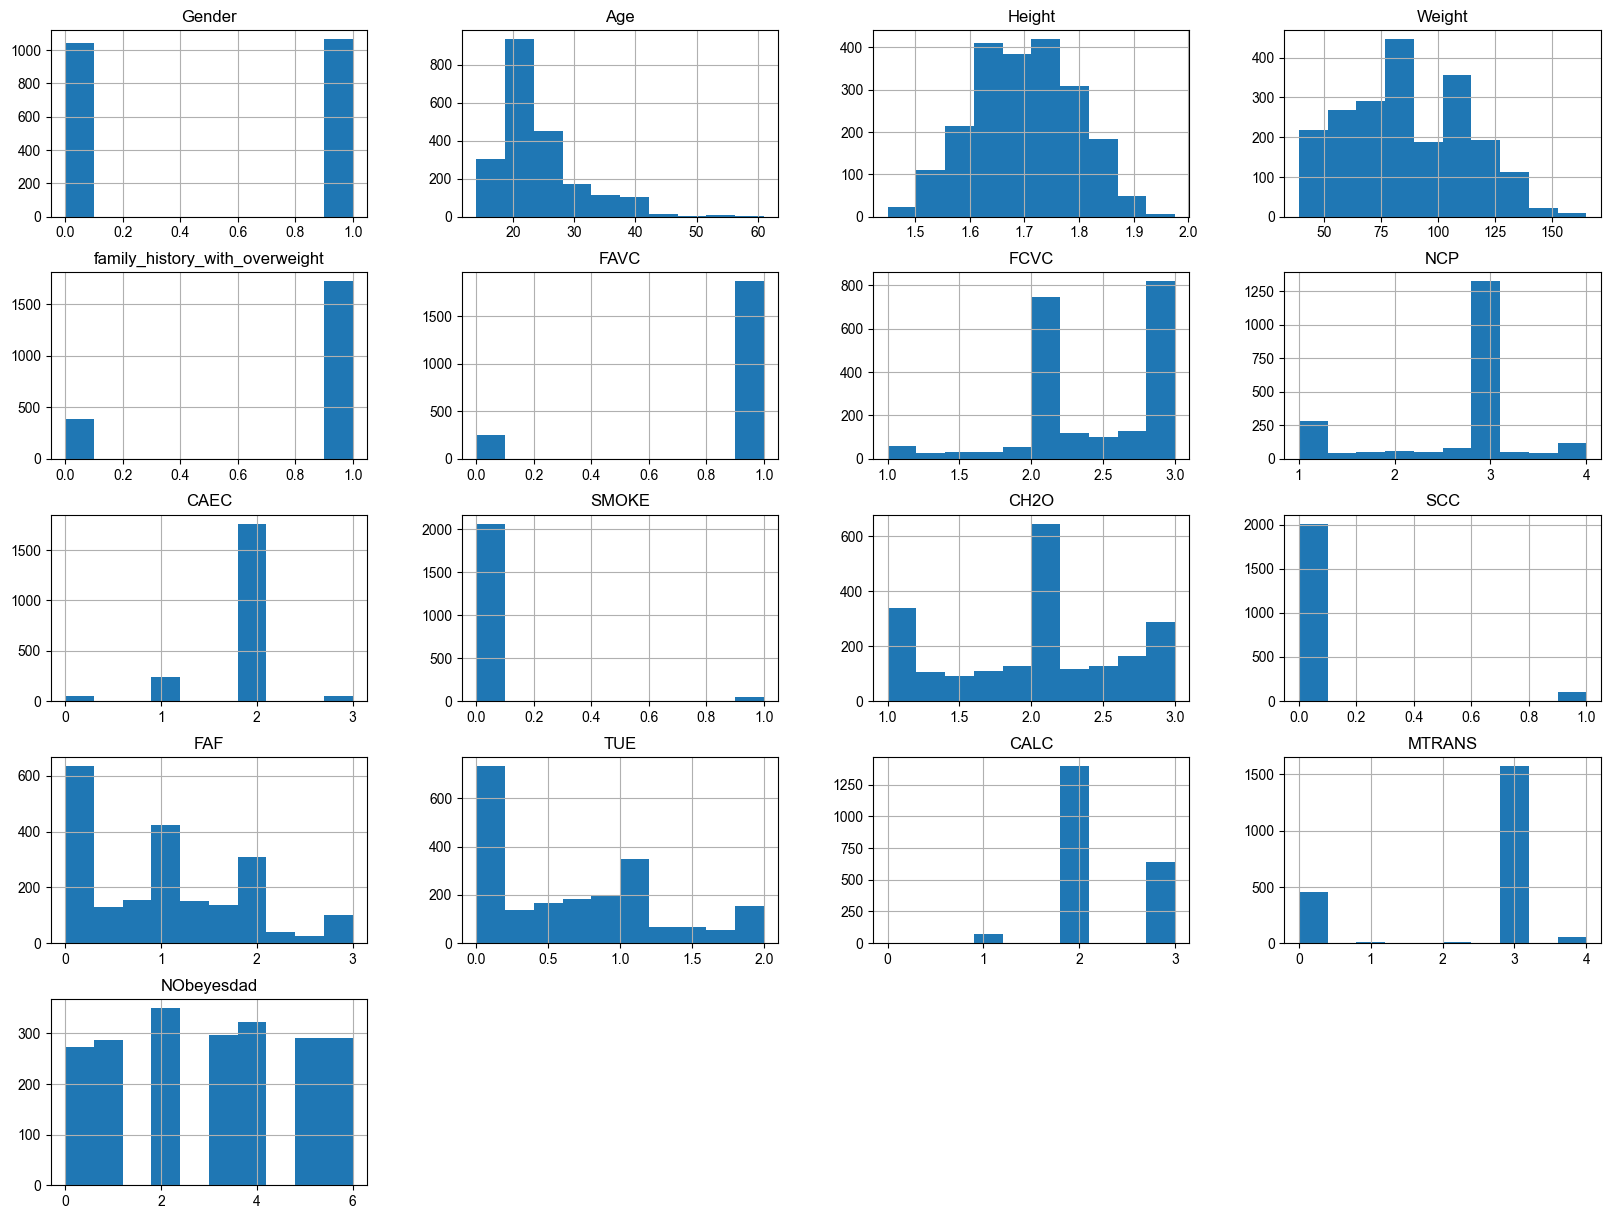

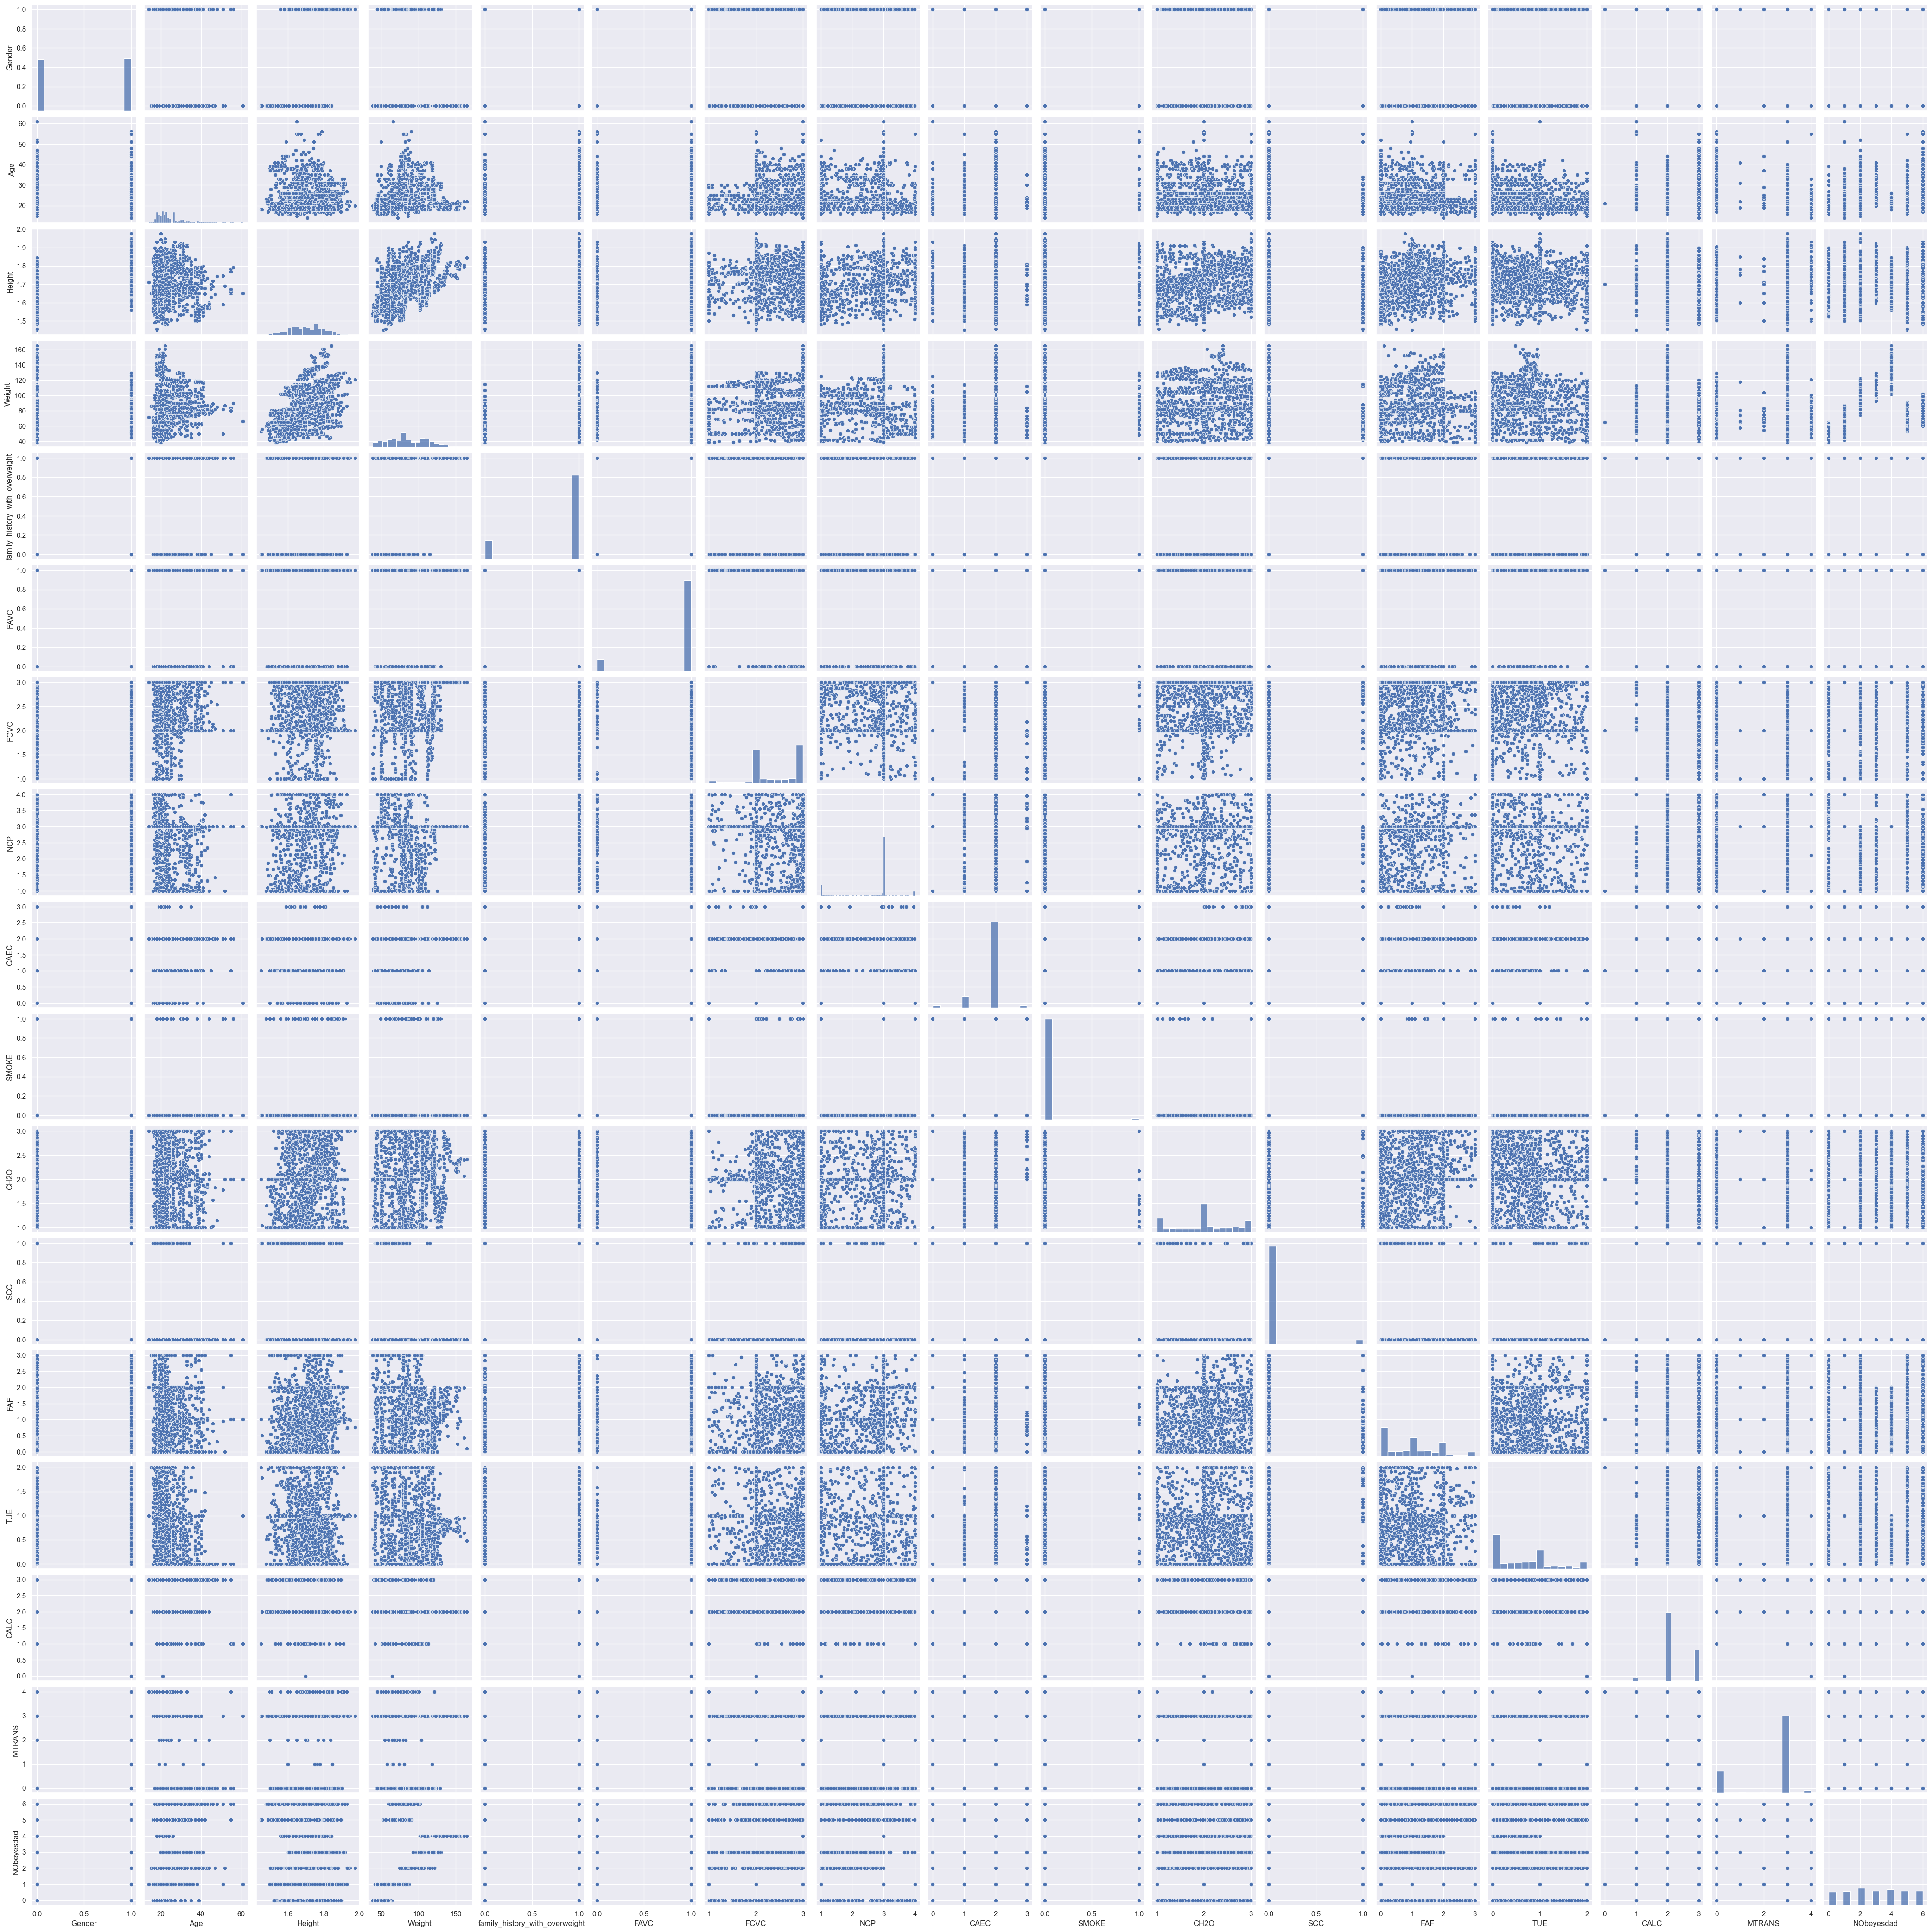

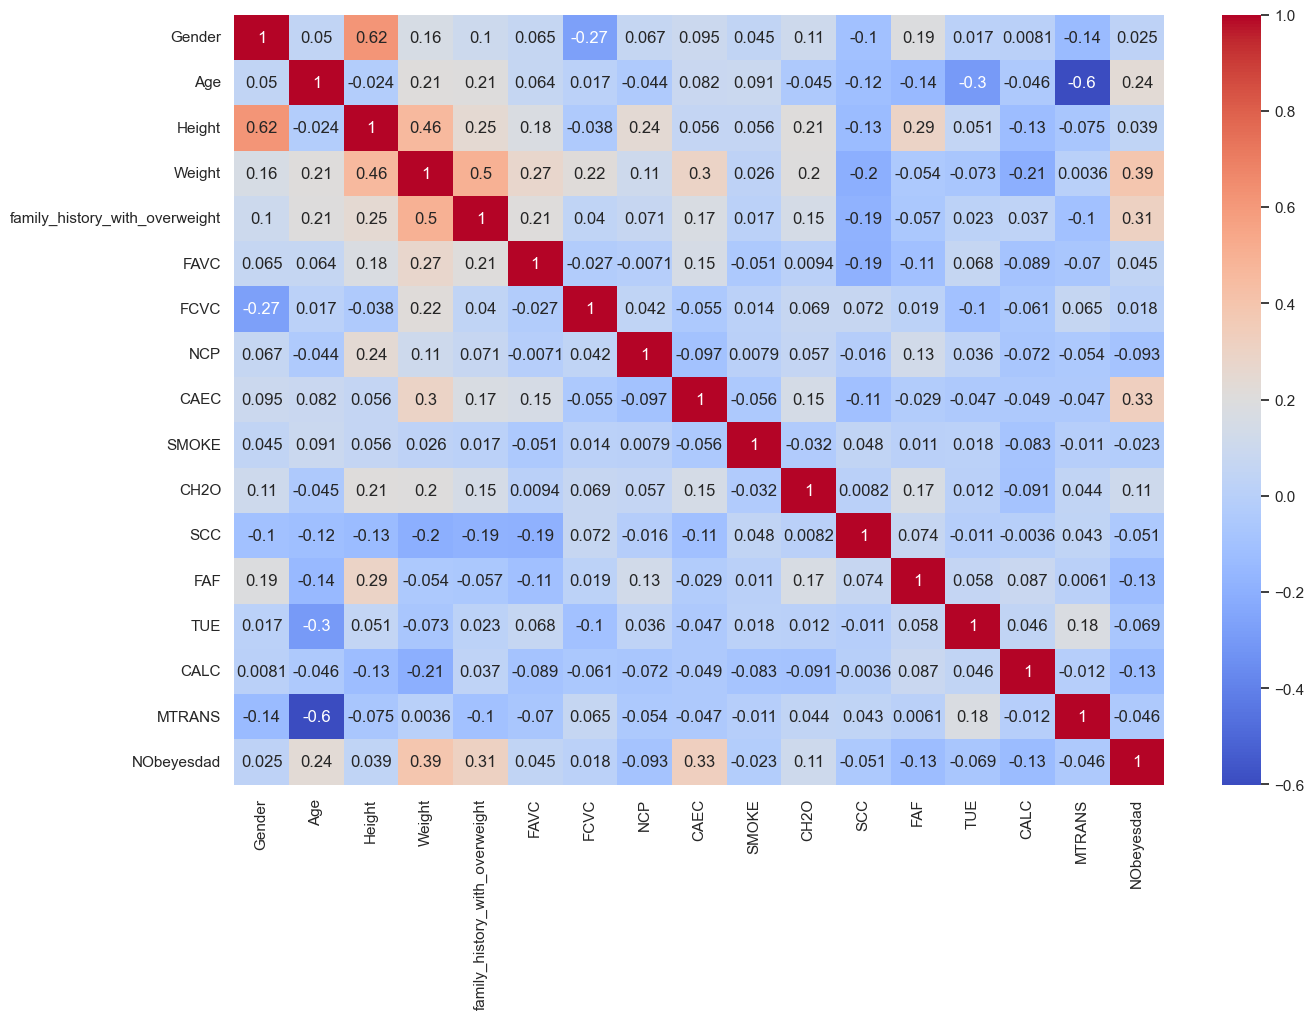

In [22]:
# Visualize the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(15, 10))

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Show the plot
plt.show()


In [23]:
from pandas import *
import numpy as np
from scipy.stats.stats import pearsonr
import itertools

correlations = {}
columns = obesity_df.columns.tolist()

for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(obesity_df.loc[:, col_a], obesity_df.loc[:, col_b])

result = DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())


                                                 PCC       p-value
Age__CAEC                                   0.082406  1.514885e-04
Age__CALC                                  -0.046013  3.460487e-02
Age__CH2O                                  -0.045133  3.821805e-02
Age__FAF                                   -0.144699  2.449541e-11
Age__FAVC                                   0.063705  3.424590e-03
...                                              ...           ...
family_history_with_overweight__NCP         0.071202  1.067622e-03
family_history_with_overweight__NObeyesdad  0.313743  2.143981e-49
family_history_with_overweight__SCC        -0.185348  9.381451e-18
family_history_with_overweight__SMOKE       0.017453  4.230803e-01
family_history_with_overweight__TUE         0.022697  2.974730e-01

[136 rows x 2 columns]


C:\Users\vidhi\AppData\Local\Temp\ipykernel_23628\1388259067.py:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


Summary :

The aim of this assignment was to conduct a statistical analysis of the provided datasets in order to identify the distribution. To achieve this objective, we utilized various libraries, including Pandas, Numpy, and Matplotlib. The initial step was to display the first five rows of the dataset using the head function. The dataset comprises of 2111 rows and 17 columns, which was determined using the shape function. In addition to analyzing the distribution, we also aimed to calculate the BMI of the dataset. We were able to achieve this by utilizing a mathematical formula that incorporates the height and weight columns.One of the challenges encountered during the analysis was the presence of character or string values such as "yes" or "no" in the dataset. In order to facilitate the statistical analysis, it was necessary to convert these values into integer values. We opted to assign a value of 1 to "yes" and 0 to "no". This data cleaning process involved converting the object data type to integer and rounding up float values as necessary.As an integral component of the data preprocessing phase, we engaged in various crucial data preparation techniques, including data integration, transformation, reduction, and cleaning, to ensure the dataset's consistency, accuracy, and overall quality.As a part of the data cleaning process, we employed a two-pronged approach to handle missing data. Initially, we discarded any affected tuples and subsequently filled the remaining missing values with appropriate and valid data points. Moreover, as with any dataset, we identified and addressed the presence of noisy data, utilizing binning techniques like the cut and qcut functions to group data points and facilitate data analysis.Furthermore, we detected and treated outliers, as these values can significantly influence analysis outcomes. We employed the Interquartile Range (IQR) outlier formula to identify and remove extreme values that could skew our analysis.To gain further insights into the relationships between the various variables in the dataset, we performed a correlation analysis. This involved using the corr function to identify correlation coefficients between different pairs of variables and visualizing the results using a heatmap. By leveraging these techniques, we were able to identify patterns and relationships within the dataset and develop a comprehensive understanding of its underlying structure.


